# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [5]:
from bs4 import BeautifulSoup
import requests

In [8]:
#Starter Code

def grab_song_link(artist_page_url):

    url = artist_page_url #Put the URL of your AZLyrics Artist Page here!

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
    albums = soup.find_all("div", class_="album")

#The example from our lecture/reading
    data = [] #Create a storage container
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
            if album_n == len(albums)-1:
                cur_album = albums[album_n]
                album_songs = cur_album.findNextSiblings('a')
                for song in album_songs:
                    page = song.get('href')
                    title = song.text
                    album = cur_album.text
                    data.append((title, page, album))
            else:
                cur_album = albums[album_n]
                next_album = albums[album_n+1]
                saca = cur_album.findNextSiblings('a') #songs after current album
                sbna = next_album.findPreviousSiblings('a') #songs before next album
                album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
                for song in album_songs:
                    page = song.get('href')
                    title = song.text
                    album = cur_album.text
                    data.append((title, page, album))
    return data

In [12]:
grabs = grab_song_link('https://www.azlyrics.com/u/u2band.html')
print(grabs[:5])

[('I Will Follow', '../lyrics/u2band/iwillfollow.html', 'album: "Boy" (1980)'), ('Twilight', '../lyrics/u2band/twilight.html', 'album: "Boy" (1980)'), ('An Cat Dubh', '../lyrics/u2band/ancatdubh.html', 'album: "Boy" (1980)'), ('Into The Heart', '../lyrics/u2band/intotheheart.html', 'album: "Boy" (1980)'), ('Out Of Control', '../lyrics/u2band/outofcontrol.html', 'album: "Boy" (1980)')]


In [ ]:
##def grab_song_link(artist_page_url)

url = 'https://www.azlyrics.com/u/u2band.html' #Put the URL of your AZLyrics Artist Page here!

html_page = requests.get(url) #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing


#The example from our lecture/reading
data = [] #Create a storage container
for album_n in range(len(albums)):
    #On the last album, we won't be able to look forward
    if album_n == len(albums)-1:
        cur_album = albums[album_n]
        album_songs = cur_album.findNextSiblings('a')
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
    else:
        cur_album = albums[album_n]
        next_album = albums[album_n+1]
        saca = cur_album.findNextSiblings('a') #songs after current album
        sbna = next_album.findPreviousSiblings('a') #songs before next album
        album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
data[:2]

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [13]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!

#Example page
url = 'https://www.azlyrics.com/lyrics/u2band/sundaybloodysunday.html'


html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Lyrics to &quot;Sunday Bloody Sunday&quot; song by U2: Yes... I can\'t believe the news today Oh, I can\'t close my eyes And make it go away How long...." name="description"/>\n  <meta content="Sunday Bloody Sunday lyrics, U2 Sunday Bloody Sunday lyrics, U2 lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   U2 - Sunday Bloody Sunday Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\n  <!--[if lt IE 9]>\r\n<script src="https:

In [14]:
divs = soup.findAll('div')

In [15]:
div = divs[0]

In [16]:
for n, div in enumerate(divs):
    if "<!-- Usage of aslyrics.com content by any " in div.text:
        print(n)

In [17]:
main_page = soup.find('div', {"class": "container main-page"})
main_l2 = main_page.find('div', {"class": "row"})
main_l3 = main_l2.find('div', {"class": "col-xs-12 col-lg-8 text-center"})

In [18]:
lyrics = main_l3.findAll('div')[6].text
lyrics

"\n\r\nYes...\n\r\nI can't believe the news today\r\nOh, I can't close my eyes \r\nAnd make it go away\r\nHow long...\r\nHow long must we sing this song\r\nHow long, how long...\r\n'cause tonight...we can be as one\r\nTonight...\n\r\nBroken bottles under children's feet\r\nBodies strewn across the dead end street\r\nBut I won't heed the battle call\r\nIt puts my back up\r\nPuts my back up against the wall\n\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\n\r\nAnd the battle's just begun\r\nThere's many lost, but tell me who has won\r\nThe trench is dug within our hearts\r\nAnd mothers, children, brothers, sisters \r\nTorn apart\n\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\n\r\nHow long...\r\nHow long must we sing this song\r\nHow long, how long...\r\n'cause tonight...we can be as one\r\nTonight...tonight... \n\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\n\r\nWipe the tears from your eyes\r\nWipe your tears away\r\nOh, wipe your tears away\r\nOh, 

In [19]:
def scrape_lyric(song_url):
    html_page = requests.get(song_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class" : "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

In [36]:
soup.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})

<div class="col-xs-12 col-lg-8 text-center">
<div class="div-share noprint">
<div class="fb-like" data-action="like" data-href="https://www.azlyrics.com/lyrics/u2band/sundaybloodysunday.html" data-layout="button_count" data-share="false" data-show-faces="false" style="float:left;"></div>
<!-- AddThis Button BEGIN -->
<script src="https://s7.addthis.com/js/300/addthis_widget.js#username=azlyrics" type="text/javascript"></script>
<div class="addthis_toolbox addthis_default_style" style="float:right;">
<a class="btn btn-xs btn-share addthis_button_email">
<span class="playblk"><img alt="Email" class="playblk" height="18" src="//www.azlyrics.com/images/email.svg" width="56"/></span>
</a>
<a class="btn btn-xs btn-share addthis_button_print" style="margin-right: 0px !important;">
<span class="playblk"><img alt="Print" class="playblk" height="18" src="//www.azlyrics.com/images/print.svg" width="56"/></span>
</a>
</div>
</div>
<!-- AddThis Button END -->
<div class="div-share"><h1>"Sunday Bloo

In [37]:
counter = 0
for div in soup.find('div', {"class" : "col-xs-12 col-lg-8 text-center"}).findAll('div'):
    print(counter)
    print(div)
    print('---------')
    counter +=1   

0
<div class="div-share noprint">
<div class="fb-like" data-action="like" data-href="https://www.azlyrics.com/lyrics/u2band/sundaybloodysunday.html" data-layout="button_count" data-share="false" data-show-faces="false" style="float:left;"></div>
<!-- AddThis Button BEGIN -->
<script src="https://s7.addthis.com/js/300/addthis_widget.js#username=azlyrics" type="text/javascript"></script>
<div class="addthis_toolbox addthis_default_style" style="float:right;">
<a class="btn btn-xs btn-share addthis_button_email">
<span class="playblk"><img alt="Email" class="playblk" height="18" src="//www.azlyrics.com/images/email.svg" width="56"/></span>
</a>
<a class="btn btn-xs btn-share addthis_button_print" style="margin-right: 0px !important;">
<span class="playblk"><img alt="Print" class="playblk" height="18" src="//www.azlyrics.com/images/print.svg" width="56"/></span>
</a>
</div>
</div>
---------
1
<div class="fb-like" data-action="like" data-href="https://www.azlyrics.com/lyrics/u2band/sundaybl

In [38]:
soup.find('div', {"class" : "col-xs-12 col-lg-8 text-center"}).findAll('div')[6].text

"\n\r\nYes...\n\r\nI can't believe the news today\r\nOh, I can't close my eyes \r\nAnd make it go away\r\nHow long...\r\nHow long must we sing this song\r\nHow long, how long...\r\n'cause tonight...we can be as one\r\nTonight...\n\r\nBroken bottles under children's feet\r\nBodies strewn across the dead end street\r\nBut I won't heed the battle call\r\nIt puts my back up\r\nPuts my back up against the wall\n\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\n\r\nAnd the battle's just begun\r\nThere's many lost, but tell me who has won\r\nThe trench is dug within our hearts\r\nAnd mothers, children, brothers, sisters \r\nTorn apart\n\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\n\r\nHow long...\r\nHow long must we sing this song\r\nHow long, how long...\r\n'cause tonight...we can be as one\r\nTonight...tonight... \n\r\nSunday, Bloody Sunday\r\nSunday, Bloody Sunday\n\r\nWipe the tears from your eyes\r\nWipe your tears away\r\nOh, wipe your tears away\r\nOh, 

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [21]:
#Use this block for your code!
stuff = scrape_lyric('https://www.azlyrics.com/lyrics/u2band/sundaybloodysunday.html')
print(stuff)
print(stuff[0])



Yes...

I can't believe the news today
Oh, I can't close my eyes 
And make it go away
How long...
How long must we sing this song
How long, how long...
'cause tonight...we can be as one
Tonight...

Broken bottles under children's feet
Bodies strewn across the dead end street
But I won't heed the battle call
It puts my back up
Puts my back up against the wall

Sunday, Bloody Sunday
Sunday, Bloody Sunday
Sunday, Bloody Sunday

And the battle's just begun
There's many lost, but tell me who has won
The trench is dug within our hearts
And mothers, children, brothers, sisters 
Torn apart

Sunday, Bloody Sunday
Sunday, Bloody Sunday

How long...
How long must we sing this song
How long, how long...
'cause tonight...we can be as one
Tonight...tonight... 

Sunday, Bloody Sunday
Sunday, Bloody Sunday

Wipe the tears from your eyes
Wipe your tears away
Oh, wipe your tears away
Oh, wipe your tears away
(Sunday, Bloody Sunday)
Oh, wipe your blood shot eyes
(Sunday, Bloody Sunday)

Sunday, Bloody 

In [22]:
songs = grab_song_link('https://www.azlyrics.com/u/u2band.html')
url_base = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_end = song[1].replace('..','')
        url = url_base + url_end
        lyr = scrape_lyric(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")

In [23]:
print(len(songs))
print(len(lyrics))

255
255


In [24]:
import pandas as pd

In [26]:
df = pd.DataFrame(list(zip(songs,lyrics)))
df.head()

,0,1
0,"(I Will Follow, ../lyrics/u2band/iwillfollow.h...",\n\r\nI will Follow...\n\r\nI was on the outsi...
1,"(Twilight, ../lyrics/u2band/twilight.html, alb...",\n\r\nI look into his eyes\r\nThey're closed b...
2,"(An Cat Dubh, ../lyrics/u2band/ancatdubh.html,...",\n\r\nSay goodnight\r\nShe waits for me to\r\n...
3,"(Into The Heart, ../lyrics/u2band/intotheheart...",\n\r\nInto the heart...of a child\r\nI stay a ...
4,"(Out Of Control, ../lyrics/u2band/outofcontrol...",\n\r\nMonday morning\r\nEighteen years of dawn...


In [33]:
len(df.iloc[1:2])

1

In [34]:
df['Song'] = df[0].map(lambda x: x[0])
df['Song_end'] = df[0].map(lambda x: x[1])
df['Album'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song,Song_end,Album
0,"(I Will Follow, ../lyrics/u2band/iwillfollow.h...",\n\r\nI will Follow...\n\r\nI was on the outsi...,I Will Follow,../lyrics/u2band/iwillfollow.html,"album: ""Boy"" (1980)"
1,"(Twilight, ../lyrics/u2band/twilight.html, alb...",\n\r\nI look into his eyes\r\nThey're closed b...,Twilight,../lyrics/u2band/twilight.html,"album: ""Boy"" (1980)"
2,"(An Cat Dubh, ../lyrics/u2band/ancatdubh.html,...",\n\r\nSay goodnight\r\nShe waits for me to\r\n...,An Cat Dubh,../lyrics/u2band/ancatdubh.html,"album: ""Boy"" (1980)"
3,"(Into The Heart, ../lyrics/u2band/intotheheart...",\n\r\nInto the heart...of a child\r\nI stay a ...,Into The Heart,../lyrics/u2band/intotheheart.html,"album: ""Boy"" (1980)"
4,"(Out Of Control, ../lyrics/u2band/outofcontrol...",\n\r\nMonday morning\r\nEighteen years of dawn...,Out Of Control,../lyrics/u2band/outofcontrol.html,"album: ""Boy"" (1980)"


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [39]:
#Use this block for your code!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:7]

I            20
walkaway,    12
will         10
follow        8
you           8
was           6
If            6
dtype: int64

Text(0.5, 1.0, 'top 7 words for: ../lyrics/u2band/twilight.html')

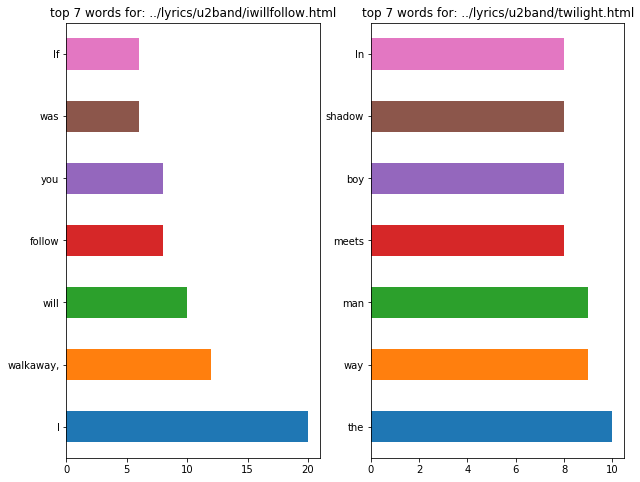

In [52]:
fig, axes = plt.subplots(1,2, figsize = (10,8))
top_7 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:7]
top_7.plot(ax = axes[0], kind='barh')
axes[0].set_title('top 7 words for: {}'.format(df['Song_end'].iloc[0]))

top_7 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:7]
top_7.plot(ax = axes[1], kind='barh')
axes[1].set_title('top 7 words for: {}'.format(df['Song_end'].iloc[1]))


## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!